In [1]:
%load_ext autoreload
%autoreload 2
from multigrid.envs import ConstrainedEnv
import matplotlib.pyplot as plt

env = ConstrainedEnv(render_mode="rgb_array", agents=2)


state, info = env.reset()

pygame 2.5.1 (SDL 2.28.2, Python 3.11.0)
Hello from the pygame community. https://www.pygame.org/contribute.html
self.max_steps=200


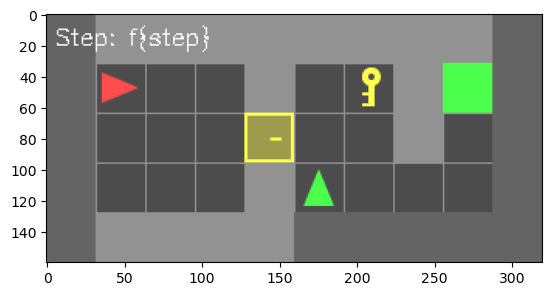

In [2]:
# Test a step and show environment is working

action = env.action_space.sample()
env.step(action)
img = env.render()
plt.imshow(img)
plt.show()


In [3]:
from DQN_multi_agent import *

In [4]:

import torch.nn as nn
import torch
import gymnasium as gym
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from typing import Dict


class MultiAgentMinigridFeaturesExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space: gym.Space, features_dim: int = 512, normalized_image: bool = False) -> None:
        super().__init__(observation_space, features_dim)

        # Assume all agents have the same observation space
        agent_obs_space = observation_space.spaces[0]['image']
        n_input_channels = agent_obs_space.shape[0]

        self.cnn = nn.Sequential(
            nn.Conv2d(n_input_channels, 16, (2, 2)),
            nn.ReLU(),
            nn.Conv2d(16, 32, (2, 2)),
            nn.ReLU(),
            nn.Conv2d(32, 64, (2, 2)),
            nn.ReLU(),
            nn.Flatten(),
        )

        # Compute shape by doing one forward pass
        with torch.no_grad():
            n_flatten = self.cnn(torch.as_tensor(agent_obs_space.sample()[None]).float()).shape[1]

        self.linear = nn.Sequential(nn.Linear(n_flatten, features_dim), nn.ReLU())

    def forward(self, observations: Dict[int, Dict[str, torch.Tensor]]) -> torch.Tensor:
        # Extract image observations for each agent and pass through CNN
        image_obs = torch.stack([obs_dict['image'] for obs_dict in observations.values()])
        cnn_out = self.cnn(image_obs)

        # Pass CNN output through linear layer
        return self.linear(cnn_out)



In [5]:
env.observation_space.spaces[0]['image'].sample()[None]

array([[[[164, 112, 229],
         [211,  20, 123],
         [189, 152, 222],
         [216,  76,  75],
         [162,  33,  87],
         [ 77,  63, 219],
         [172, 153, 218]],

        [[ 95, 212,  38],
         [212,  61, 191],
         [ 38, 122, 159],
         [  2, 174,  54],
         [223,  96, 201],
         [ 23, 129, 136],
         [ 15, 127, 237]],

        [[222, 148,  33],
         [ 64, 233,  78],
         [ 32,  60,  43],
         [ 42,  90,  49],
         [ 55, 114,  49],
         [172,  35, 165],
         [ 70,  30, 168]],

        [[198, 135, 202],
         [ 74, 240,   7],
         [153,  90,  30],
         [ 41, 244, 201],
         [181, 234, 140],
         [ 52, 184, 223],
         [212,  91, 101]],

        [[ 40, 249, 181],
         [132, 201, 158],
         [ 15, 137, 140],
         [176, 119,  30],
         [164,  52, 189],
         [100,  55, 104],
         [185,   3, 156]],

        [[ 81, 189, 121],
         [226, 165,  13],
         [ 44, 254, 230],
  

In [7]:
image_space = env.observation_space.spaces[0]['image']

n_input_channels = image_space.shape[0]


cnn = nn.Sequential(
            nn.Conv2d(n_input_channels, 16, (2, 2)),
            nn.ReLU(),
            nn.Conv2d(16, 32, (2, 2)),
            nn.ReLU(),
            nn.Conv2d(32, 64, (2, 2)),
            nn.ReLU(),
            nn.Flatten(),
        )

In [8]:
torch.as_tensor(env.observation_space.spaces[0]['image'].sample()[None]).float()

tensor([[[[ 93., 145., 231.],
          [ 33., 100.,  30.],
          [121., 135., 136.],
          [127., 227.,  64.],
          [ 72., 157.,  34.],
          [ 62., 186., 226.],
          [207., 132.,  68.]],

         [[ 55.,  52., 221.],
          [ 14.,  87., 134.],
          [182., 128., 253.],
          [151., 173.,  99.],
          [115., 148., 227.],
          [223.,  69., 174.],
          [ 62.,  43.,  93.]],

         [[ 97., 120.,   2.],
          [243.,  38.,  83.],
          [115.,   5., 192.],
          [136., 124., 222.],
          [215., 108.,  30.],
          [ 84.,  92., 218.],
          [ 28.,  83.,  56.]],

         [[175., 239., 222.],
          [  4.,  28., 192.],
          [ 31., 190.,  73.],
          [247., 208.,  75.],
          [ 60., 238.,  91.],
          [130., 149.,  85.],
          [254.,  52.,  72.]],

         [[140., 192., 154.],
          [149., 126.,  72.],
          [  4., 161., 231.],
          [236., 101., 149.],
          [151., 214., 121.],
  

In [9]:
n_input_channels

7

In [13]:
# n_flatten = cnn(torch.as_tensor(env.observation_space.spaces[0]['image'].sample()[None]).float()).shape[1]
n_flatten = cnn(torch.as_tensor(env.observation_space.spaces[0]['image'].sample()[None]).float()).shape[1]

: 

: 

In [6]:
agent = Agent(env)
agent.train(20,env)
print("we did it")

: 

: 

In [ ]:
print(env.observation_space)

Dict(0: Dict('direction': Discrete(4), 'image': Box(0, 255, (7, 7, 3), int64), 'mission': MissionSpace('get to the green goal square, you rascal')), 1: Dict('direction': Discrete(4), 'image': Box(0, 255, (7, 7, 3), int64), 'mission': MissionSpace('get to the green goal square, you rascal')))


In [ ]:
env = gym.make(
    "LunarLander-v2",
    continuous = False,
    gravity = -10.0,
    enable_wind = False,
    wind_power = 15.0,
    turbulence_power = 1.5
)

In [9]:
env.observation_space

Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.       ], (8,), float32)